# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [1]:
import warnings
warnings.simplefilter("ignore")

# 1- import packages and load data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# 2- show some general properties for the data 

In [3]:
df=pd.read_excel(r"D:\IEEE TASK\New folder\candyhierarchy2017.xlsx")
df.head(20)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
5,90272852,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"(75, 23)"
6,90272853,No,Male,53,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,90272854,No,Male,33,canada,ontario,JOY,DESPAIR,JOY,DESPAIR,...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins",Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(55, 5)"
8,90272858,No,Male,40,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,NaN,NaN,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(76, 24)"
9,90272859,No,Female,53,Us,Wa,MEH,DESPAIR,JOY,MEH,...,NaN,NaN,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(70, 28)"


In [4]:
#columns=['GOING OUT?','GENDER','AGE','COUNTRY','STATE, PROVINCE, COUNTY, ETC',]

In [5]:
df.shape

(2460, 120)

In [6]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [7]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

- columns names may be changed 
- Data has 2460 rows and 120 columns.
- column age is object but it must be int
- Q6 is the main idea of the project
- columns ( Unnamed: ,Q12(media))have many missing values



In [8]:
df.iloc[:,0:50].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 50 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Internal ID                                                                            2460 non-null   int64 
 1   Q1: GOING OUT?                                                                         2350 non-null   object
 2   Q2: GENDER                                                                             2419 non-null   object
 3   Q3: AGE                                                                                2376 non-null   object
 4   Q4: COUNTRY                                                                            2396 non-null   object
 5   Q5: STATE, PROVINCE, COUNTY, ETC                                                   

In [9]:
df.iloc[:,50:].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 70 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Q6 | Kit Kat                                                                 1786 non-null   object 
 1   Q6 | LaffyTaffy                                                              1724 non-null   object 
 2   Q6 | LemonHeads                                                              1730 non-null   object 
 3   Q6 | Licorice (not black)                                                    1774 non-null   object 
 4   Q6 | Licorice (yes black)                                                    1775 non-null   object 
 5   Q6 | Lindt Truffle                                                           1742 non-null   object 
 6   Q6 | Lollipops                          

In [10]:
#col_name = ['GOING OUT?','GENDER','AGE','COUNTRY','ADMINISTRATIVE DEFINITION','100 Grand Bar','DRESS','DAY',
 #           'MEDIA [Science]','Click Coordinate X','Click Coordinate Y']
#df.columns=col_name

In [11]:
df.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [12]:
df.rename(columns = {'Q1: GOING OUT?' : 'Going Out?','Q2: GENDER' : 'Gender','Q3: AGE': 'Age','Q4: COUNTRY' : 'Country','Q5: STATE, PROVINCE, COUNTY, ETC' : 'Area','Q10: DRESS' : 'Dress','Q11: DAY': 'Day'}, inplace=True)

In [13]:
df.columns = [x for x in df.columns.str.replace("Q6 \| ",'')]


In [14]:
df.drop(['Internal ID','Unnamed: 113' ,'Click Coordinates (x, y)','Q7: JOY OTHER','Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Area'],axis=1,inplace=True)

In [15]:
df.head(10)

,Going Out?,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,NaN,Male,49,USA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
4,No,Male,23,usa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
5,No,Male,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,1.0,NaN,NaN
6,No,Male,53,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No,Male,33,canada,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday,NaN,1.0,NaN,NaN
8,No,Male,40,Canada,JOY,DESPAIR,JOY,MEH,MEH,MEH,...,MEH,DESPAIR,DESPAIR,DESPAIR,Blue and black,Sunday,NaN,1.0,NaN,NaN
9,No,Female,53,Us,MEH,DESPAIR,JOY,MEH,MEH,MEH,...,MEH,DESPAIR,DESPAIR,MEH,White and gold,Sunday,NaN,1.0,NaN,NaN


### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [16]:
#df['Q1: GOING OUT?']=df['Q1: GOING OUT?'].astype('category')

In [17]:
df = df.dropna(subset = ['Going Out?'])

In [18]:
df['Going Out?']

1       No
3       No
4       No
5       No
6       No
        ..
2455    No
2456    No
2457    No
2458    No
2459    No
Name: Going Out?, Length: 2350, dtype: object

In [19]:
df['Going Out?'].unique()

array(['No', 'Yes'], dtype=object)

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [20]:
df['Gender'].value_counts()

Male                  1404
Female                 825
I'd rather not say      78
Other                   29
Name: Gender, dtype: int64

In [21]:
df['Gender'].fillna("I'd rather not say",inplace=True)
df['Gender'].replace("I'd rather not say",'Other',inplace=True)


In [22]:
df['Gender'].value_counts()

Male      1404
Female     825
Other      121
Name: Gender, dtype: int64

In [23]:
df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [24]:
df['Age'].unique()

array([44, 40, 23, nan, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45, 49,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 41, 27, 61, 46, 42, 62, 29,
       39, 32, 31, 28, 69, 67, 22, 26, 51, 70, 24, 18, 19, 'Old enough',
       57, 60, 66, 12, 30, 'Many', 65, 55, 72, '?', 21, 11, 'no', 9, 68,
       20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88, 39.4,
       74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [25]:
df['Age'].replace(['5u','46 Halloweens.','sixty-nine','Over 50','OLD','MY NAME JEFF','59 on the day after Halloween','your mom'
                      'I can remember when Java was a cool new language', '60+',312,1000,'Old enough','your mom','I can remember when Java was a cool new language','Enough', 'See question 2','ancient','hahahahaha','Many','old enough', 'older than dirt','?','no','old','24-50','45-55','NaN'],np.nan,inplace=True)

In [26]:
df['Age'].unique()

array([ 44. ,  40. ,  23. ,   nan,  53. ,  33. ,  43. ,  56. ,  64. ,
        37. ,  59. ,  48. ,  54. ,  36. ,  45. ,  49. ,  25. ,  34. ,
        35. ,  38. ,  58. ,  50. ,  47. ,  16. ,  52. ,  63. ,  41. ,
        27. ,  61. ,  46. ,  42. ,  62. ,  29. ,  39. ,  32. ,  31. ,
        28. ,  69. ,  67. ,  22. ,  26. ,  51. ,  70. ,  24. ,  18. ,
        19. ,  57. ,  60. ,  66. ,  12. ,  30. ,  65. ,  55. ,  72. ,
        21. ,  11. ,   9. ,  68. ,  20. ,   6. ,  10. ,  71. ,  90. ,
        13. ,  99. ,   7. ,  88. ,  39.4,  74. , 102. ,  17. ,  15. ,
         8. ,  75. ,  14. , 100. ,  76. ,  77. ,  73. ,  70.5,   1. ,
         4. ])

In [27]:
pd.to_numeric(df['Age'])

1       44.0
3       40.0
4       23.0
5        NaN
6       53.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: Age, Length: 2350, dtype: float64

In [28]:
X=df['Age'].mode()
X

0    37.0
1    40.0
dtype: float64

In [29]:
df['Age'].fillna(X[0],inplace=True)

In [30]:
df['Age'].isna().sum()

0

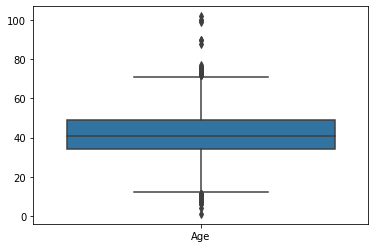

In [31]:
sns.boxplot(data=df.loc[:,['Age']])
plt.show()

In [32]:
df.head()

,Going Out?,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
1,No,Male,44.0,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
3,No,Male,40.0,us,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
4,No,Male,23.0,usa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
5,No,Male,37.0,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,1.0,NaN,NaN
6,No,Male,53.0,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [33]:
df['Country']=df['Country'].str.lower()

In [34]:
df['Country'].unique()

array(['usa ', 'us', 'usa', nan, 'canada', 'murica', 'united states',
       'uk', 'united kingdom', 'united states ', 'united staes',
       'united states of america', 'uae', 'england', 'mexico', 'u.s.a.',
       'usausausa', 'america', 'france', 'united states of america ',
       'finland', 'unhinged states', 'canada ', 'us of a',
       'unites states', 'the united states', 'north carolina ',
       'unied states', 'netherlands', 'germany', 'europe', 'earth', 'u s',
       'u.s.', 'u.k. ', 'costa rica', 'the united states of america',
       'unite states', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'trumpistan', 'ireland',
       'united sates', 'korea', 'california', 'japan', 'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'scotland', 'uk ', 'denmark', 'united stated',
       'france ', 'switzerland', '

In [35]:
countries = pd.Series(['usa', 'united states of america','america', 'mexico','france','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands', 
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa', 
                       'japan', 'greece', 'costa rica', 'germany', 'finland'])

for country in countries:
    matches = process.extract(country, df['Country'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Country'] == potential_match[0], 'Country'] = country
            
df['Country'].unique()

array(['usa', nan, 'canada', 'murica', 'america', 'uk', 'uae',
       'united kingdom england', 'mexico', 'u.s.a.', 'france', 'finland',
       'north carolina ', 'netherlands', 'germany', 'europe', 'earth',
       'u.k. ', 'costa rica', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'canae', 'trumpistan',
       'iceland', 'south korea', 'california', 'japan', 'south africa',
       'scotland', 'uk ', 'denmark', 'switzerland', 'ud', 'new jersey',
       'indonesia', 'endland', 'atlantis', 'murrika', 'alaska',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong',
       'spain', 'sweden', 'narnia', 'u s a',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [36]:
df.Country.value_counts()

usa                               1271
america                            705
canada                             215
uk                                  17
germany                             10
u.s.a.                               8
australia                            7
netherlands                          7
scotland                             5
iceland                              5
japan                                5
mexico                               4
switzerland                          3
france                               3
denmark                              2
sweden                               2
hong kong                            2
china                                2
indonesia                            1
soviet canuckistan                   1
taiwan                               1
earth                                1
u.k.                                 1
california                           1
u s a                                1
finland                  

In [37]:
country_names={'america':'usa','canada':'usa','u.s.a.':'usa','usa? hard to tell anymore..':'usa','u s a ':'usa','u.k. ':'uk','uk':'uk'
              ,}
df['Country'] = df['Country'].replace(country_names)
df.Country[~df['Country'].isin(['usa', 'uk','germany'])]='other'


In [38]:
df['Country'].isna().sum()

0

In [39]:
df['Country'].fillna('usa',inplace=True)

<AxesSubplot:ylabel='Country'>

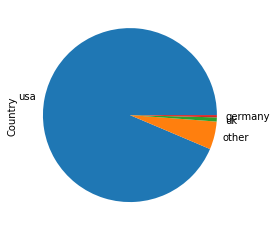

In [40]:
df.Country.value_counts().plot(kind = 'pie' )


### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [41]:
#df=df.drop('Area' , axis=1, inplace=True)


### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [42]:
df.iloc[:,4:-6].columns


Index(['100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)', 'Bottle Caps', 'Box'o'Raisins',
       'Broken glow stick', 'Butterfinger',
       ...
       'Three Musketeers', 'Tolberone something or other', 'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=103)

In [43]:
df.iloc[:,4:-6].mode()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY


In [44]:
df.iloc[:,4:-6].fillna('MEH',inplace=True)

In [45]:
df

,Going Out?,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
1,No,Male,44.0,usa,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
3,No,Male,40.0,usa,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
4,No,Male,23.0,usa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
5,No,Male,37.0,other,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,1.0,NaN,NaN
6,No,Male,53.0,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24.0,usa,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,MEH,DESPAIR,MEH,White and gold,Friday,NaN,NaN,NaN,NaN
2456,No,Female,33.0,usa,MEH,DESPAIR,JOY,NaN,NaN,NaN,...,JOY,DESPAIR,MEH,JOY,Blue and black,Friday,NaN,1.0,NaN,NaN
2457,No,Female,26.0,usa,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,...,MEH,DESPAIR,DESPAIR,MEH,Blue and black,Friday,NaN,1.0,NaN,NaN
2458,No,Male,58.0,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [46]:
df['Dress']

1       White and gold
3       White and gold
4       White and gold
5                  NaN
6                  NaN
             ...      
2455    White and gold
2456    Blue and black
2457    Blue and black
2458               NaN
2459    White and gold
Name: Dress, Length: 2350, dtype: object

In [47]:
df['Dress'].value_counts()

White and gold    1054
Blue and black     603
Name: Dress, dtype: int64

In [48]:
mode =df['Dress'].mode()
mode

0    White and gold
dtype: object

In [49]:
df['Dress'].isna().sum()

693

In [50]:
df['Dress'].fillna('White and gold',inplace=True)

In [51]:
df['Dress'].unique()

array(['White and gold', 'Blue and black'], dtype=object)

In [52]:
df['Dress'].value_counts()

White and gold    1747
Blue and black     603
Name: Dress, dtype: int64

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [53]:
df['Day'].isna().sum()

674

In [54]:
df['Day'].value_counts()

Friday    1055
Sunday     621
Name: Day, dtype: int64

In [55]:
df['Day'].fillna(method ='bfill',inplace=True)


In [56]:
df['Day'].isna().sum()


0

In [57]:
df['Day'].value_counts()

Friday    1484
Sunday     866
Name: Day, dtype: int64

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

In [60]:
df.isna().sum()

Going Out?                    0
Gender                        0
Age                           0
Country                       0
100 Grand Bar               698
                           ... 
Day                           0
Q12: MEDIA [Daily Dish]    2266
Q12: MEDIA [Science]       1033
Q12: MEDIA [ESPN]          2252
Q12: MEDIA [Yahoo]         2289
Length: 113, dtype: int64

In [59]:
df.iloc[:,0:50].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 1 to 2459
Data columns (total 50 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Going Out?                                                                        2350 non-null   object 
 1   Gender                                                                            2350 non-null   object 
 2   Age                                                                               2350 non-null   float64
 3   Country                                                                           2350 non-null   object 
 4   100 Grand Bar                                                                     1652 non-null   object 
 5   Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes)  1668 non-null   object 
 6   

### 14 - write a summary about all the cleaning steps 